# Projekat iz predmeta Osnovi Računarske Inteligencije

#### Problem koji se rešava je predikcija potrošnje automobila, odnosno predikcija mpg(miles per gallon) na osnovu sledećih atributa:
    1. Broj cilindara
    2. Prenos
    3. Broj konjskih snaga
    4. Težina
    5. Ubrzanje
    6. Godina proizvodnje
    7. Poreklo (1 - Amerika, 2 - Evropa, 3 - Azija)
    8. Naziv automobila
    
#### Dataset: https://www.kaggle.com/uciml/autompg-dataset

#### Broj instanci: 398

#### Broj atributa: 9

### Algoritmi koji su korišćeni:
#####    1. Multivariate Linear Regression
      Regresija ima za cilj da pronađe funkciju koja se “najbolje uklapa” u podatke uz
      pretpostavku da rezultujuća funkcija ne mora da prođe kroz svaku tačku.
#####    2. Ridge Regression 
      Varijacija obične regresije. Korisna ukoliko dataset sadrži outlier-e, koji kvare model.
      Problem rešava dodavanjem kvadrirane norme težina na funkciju greške.
#####    3. Lasso Regression 
      Varijacija obične regresije. Korisna ukoliko dataset ima mali broj nezavisnih promenljivih,
      ali velik broj tačaka. Problem rešava dodavanjem norme težina na funkciju greške.
#####    4. ElasticNet Regression
      Predstavlja kombinaciju Ridge i Lasso regresije.

$$ \textbf{Multivariate Linear Regression: } $$

$$ \textbf{Error function:} \ E = \sum_{i=1}^{N} (y_{i} - \hat{y_{i}})^{2} =  \sum_{i=1}^{N} (y_{i} - w^\top x_{i})^{2},\ y_{i} - stvarna \ vrednost, \ \hat{y_{i}} - predikcija $$

$$ \frac{\partial E}{\partial w_{j}} = \sum_{i=1}^N 2(y_{i} - w^\top x_{i})(-x_{ij}) = 0, \ i - red, \ j - kolona(nezavisna \ promenljiva) $$

$$ w^\top \sum_{i=1}^N x_{i}x_{ij} = \sum_{i=1}^N y_{i}x_{ij} $$

$$ w^\top(X^\top X) = y^\top X $$

$$ \bigg[w^\top(X^\top X)\bigg]^\top = \bigg[y^\top X\bigg]^\top$$

$$ (X^\top X)w = X^\top y$$

$$ w = (X^\top X)^{-1}X^\top y $$

$$ \textbf{Ridge Regression: } $$

$$ \textbf{Error function:} \ E = \sum_{i=1}^{N} (y_{i} - \hat{y_{i}})^{2} + \lambda \ |w|^{2},\ y_{i} - stvarna \ vrednost, \ \hat{y_{i}} - predikcija $$

$$ |w|^{2} = w^\top w = w_{1}^{2} + w_{2}^{2} + ... + w_{i}^{2}, \ w - vektor \ težina, \ \lambda - proizvoljan \ parametar $$

$$ \textbf{Matrix form of Error function}: $$

$$ E = (y - Xw)^\top (y - Xw) + \lambda w^\top w $$

$$ E = y^\top y - 2y^\top Xw + w^\top X^\top Xw + \lambda w^\top w $$

$$ \frac{\partial E}{\partial w} = -2X^\top y + 2X^\top Xw + 2 \lambda w = 0 $$

$$ w = (\lambda I + X^\top X)^{-1}X^\top y $$

$$ \textbf{Lasso Regression: } $$

$$ \textbf{Error function:} \ E = \sum_{i=1}^{N} (y_{i} - \hat{y_{i}})^{2} + \lambda \ |w|,\ y_{i} - stvarna \ vrednost, \ \hat{y_{i}} - predikcija $$

$$ \textbf{Matrix form of Error function}: $$

$$ E = (y - Xw)^\top (y - Xw) + \lambda w$$

$$ E = y^\top y - 2y^\top Xw + w^\top X^\top Xw + \lambda |w| $$
$$ \frac{\partial E}{\partial w} = -2X^\top y + 2X^\top Xw + \lambda sign(w) = 0 $$

$$ sign(x) = 
     \begin{cases}
        1 &\quad\text{if x > 0} \\
       -1 &\quad\text{if x < 0}\\
        0 &\quad\text{if x = 0}\\
     \end{cases} $$
     
$$ \text{Iz prethodne formule w ne može da se izrazi, pa se ovaj problem rešava Gradient Descent algoritmom} $$

$$ \textbf{ElasticNet Regression: } $$

$$ \textbf{Error function:} \ E = \sum_{i=1}^{N} (y_{i} - \hat{y_{i}})^{2} + \lambda \ |w| + \lambda |w|^{2},\ y_{i} - stvarna \ vrednost, \ \hat{y_{i}} - predikcija $$

$$ |w|^{2} = w^\top w = w_{1}^{2} + w_{2}^{2} + ... + w_{i}^{2}, \ w - vektor \ težina, \ \lambda - proizvoljan \ parametar $$

$$\text{Predikcija se u svakom od prethodnih modela dobija sledećom formulom} $$


$$\textbf{Regression model: } \hat{y} = w^\top X, \ \hat{y} - vektor \ predikcija, \ w - težine $$

### Za evaluaciju modela korišćene su sledeće metrike:
    1. Coefficient of determination (R Squared) - najbolji mogući rezultat je 1.0, može biti i negativan
    2. Mean Absolute Error - što je manja vrednost, model je bolji
    3. Explained Variance Score - najbolji mogući rezultat je 1.0, što je manji model je lošiji

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline


In [2]:
df = pd.read_csv('auto-mpg.csv')

In [3]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


Za dalju analizu zanemariću naziv automobila, a iz tabele dole se vidi da fali horsepower kolona

In [4]:
df.describe()

,mpg,cylinders,displacement,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


Vrednosti u horsepower koloni su stringovi pa ih treba konvertovati u broj

In [5]:
type(df.horsepower[0])

str

In [6]:
df = df[df.horsepower != '?']
df.horsepower = df.horsepower.astype('float64')

In [7]:
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

In [8]:
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592,1.576531
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737,0.805518
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000,1.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


### Vizualizacija

Vizualizacija matrice korelacije



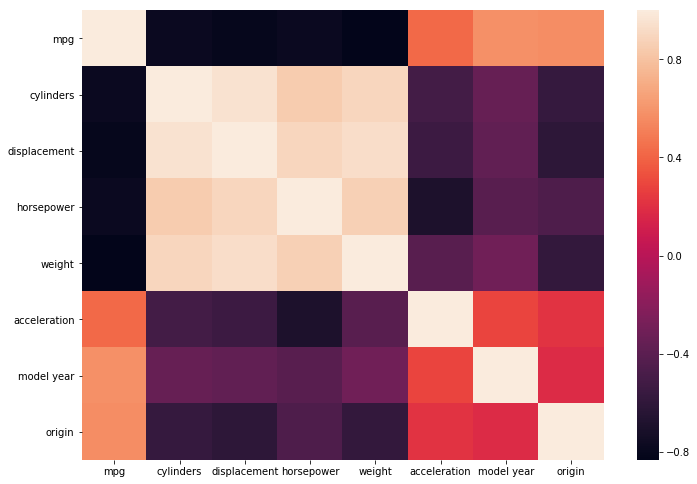

In [80]:
correlation = df.corr(method = 'pearson')

dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize = dims)

sns.heatmap(ax = ax, data = correlation, xticklabels=correlation.columns, yticklabels=correlation.columns)
print('Vizualizacija matrice korelacije\n')

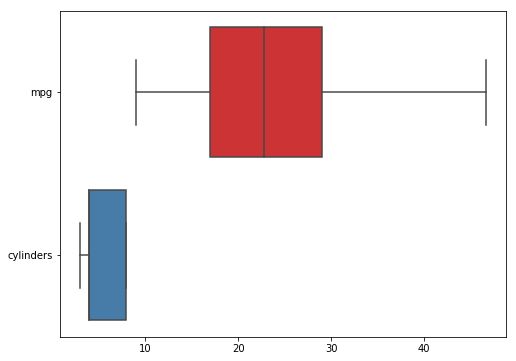

In [81]:
dims = (8, 6)
fig, ax = plt.subplots(figsize = dims)
sns.boxplot(ax=ax, data = df[['mpg', 'cylinders']], orient="h", palette="Set1")
print()

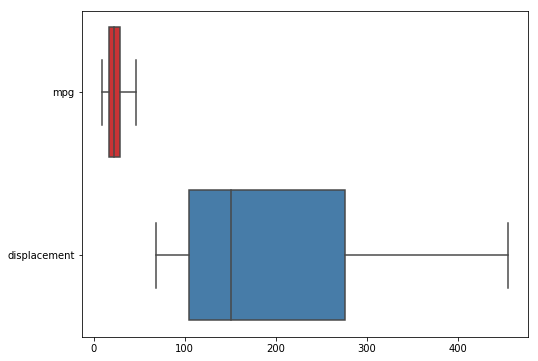

In [82]:
dims = (8, 6)
fig, ax = plt.subplots(figsize = dims)
sns.boxplot(ax=ax, data = df[['mpg', 'displacement']], orient="h", palette="Set1")
print()

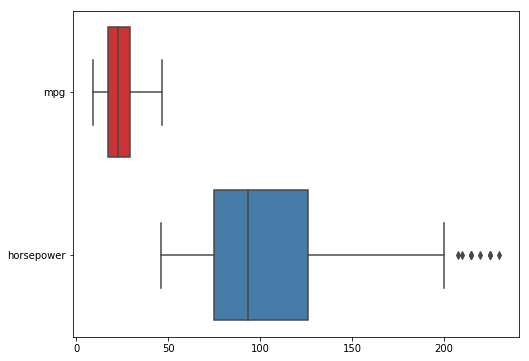

In [83]:
dims = (8, 6)
fig, ax = plt.subplots(figsize = dims)
sns.boxplot(ax=ax, data = df[['mpg', 'horsepower']], orient="h", palette="Set1")
print()

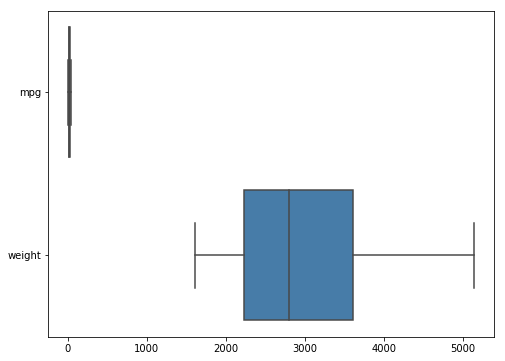

In [84]:
dims = (8, 6)
fig, ax = plt.subplots(figsize = dims)
sns.boxplot(ax=ax, data = df[['mpg', 'weight']], orient="h", palette="Set1")
print()

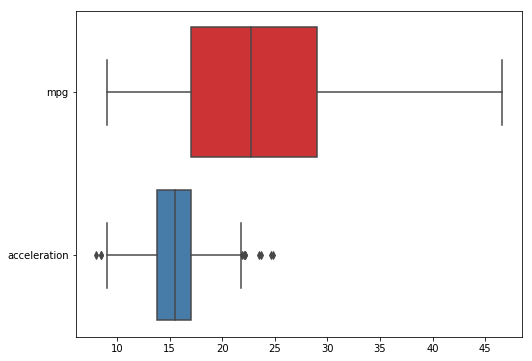

In [85]:
dims = (8, 6)
fig, ax = plt.subplots(figsize = dims)
sns.boxplot(ax=ax, data = df[['mpg', 'acceleration']], orient="h", palette="Set1")
print()

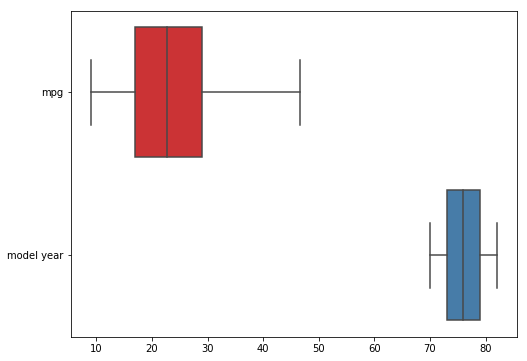

In [87]:
dims = (8, 6)
fig, ax = plt.subplots(figsize = dims)
sns.boxplot(ax=ax, data = df[['mpg', 'model year']], orient="h", palette="Set1")
print()

MPG Histogram


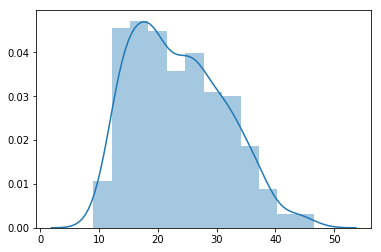

In [10]:
sns.distplot(df.iloc[:, 0].values)
print('MPG Histogram')

Cylinders Histogram


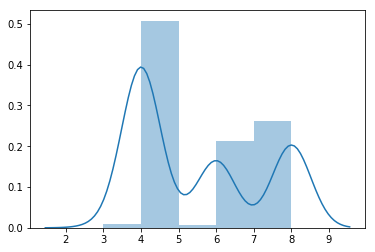

In [11]:
sns.distplot(df.iloc[:, 1].values)
print('Cylinders Histogram')

Displacement Histogram


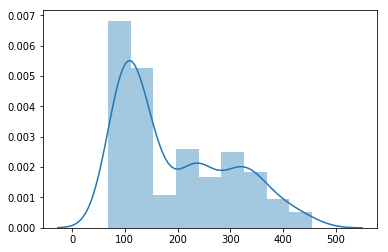

In [12]:
sns.distplot(df.iloc[:, 2].values)
print('Displacement Histogram')

Horsepower Histogram


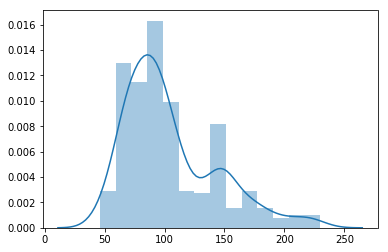

In [13]:
sns.distplot(df.iloc[:, 3].values)
print('Horsepower Histogram')

Weight Histogram


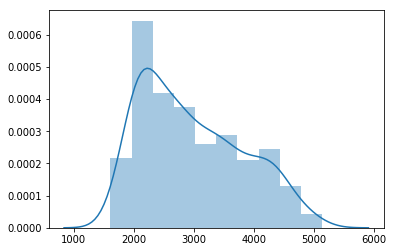

In [14]:
sns.distplot(df.iloc[:, 4].values)
print('Weight Histogram')

Acceleration Histogram


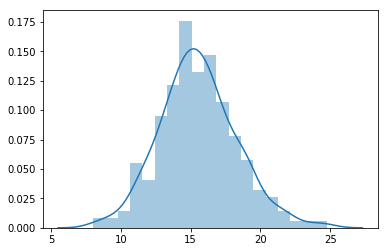

In [15]:
sns.distplot(df.iloc[:, 5].values)
print('Acceleration Histogram')

Model Year Histogram


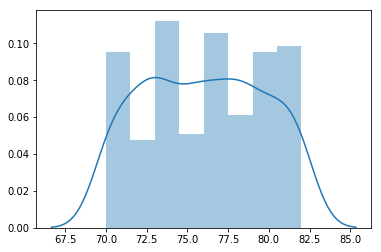

In [16]:
sns.distplot(df.iloc[:, 6].values)
print('Model Year Histogram')

Origin Histogram


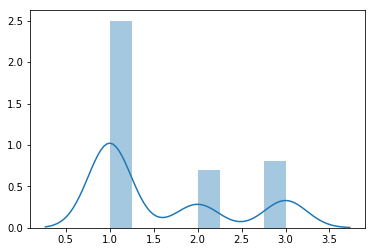

In [17]:
sns.distplot(df.iloc[:, 7].values)
print('Origin Histogram')

### Predikcija koristeći sve nezavisne promenjive sem poslednje - naziv automobila

In [18]:
import stats
from sklearn.metrics import explained_variance_score
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

X = df.iloc[:, 1 : 8].values.astype('float64')
y = df.iloc[:, 0].values.astype('float64')

df.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model year', 'origin', 'car name'],
      dtype='object')

In [19]:
for i in range(0, X.shape[1]):
    print('Correlation between Y and X{} is {}'.format(i+1,
          stats.get_pearson_corr(y.tolist(), X[:, i].tolist())))

Correlation between Y and X1 is -0.7776175081260218
Correlation between Y and X2 is -0.8051269467104581
Correlation between Y and X3 is -0.7784267838977751
Correlation between Y and X4 is -0.8322442148315757
Correlation between Y and X5 is 0.4233285369027873
Correlation between Y and X6 is 0.580540966090785
Correlation between Y and X7 is 0.5652087567164613


In [20]:
X, y = stats.standardize(X, y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [21]:
from linear_model import LinearRegression, Ridge, Lasso, ElasticNet

models = []
models.append(('LinearRegression', LinearRegression()))
models.append(('Ridge', Ridge()))
models.append(('Lasso', Lasso()))
models.append(('ElasticNet', ElasticNet()))

In [22]:
for name, model in models:
    model.fit(X_train, y_train, X_test, y_test)
    predictions = model.predict()
    
    r_sqared = stats.get_r_squared(y_test, predictions)
    score = explained_variance_score(y_test, predictions)
    mae = mean_absolute_error(predictions, y_test)
    
    msg = "{} => EVS: {} MAE: {} R^2: {}".format(name, score, mae, r_sqared)
    print(msg)

LinearRegression => EVS: 0.8137427516623791 MAE: 0.30964832158846334 R^2: 0.8118881423003085
Ridge => EVS: 0.7867401491718748 MAE: 0.3289504822276145 R^2: 0.7827038041355148
Lasso => EVS: 0.8155975824040702 MAE: 0.30847338238352445 R^2: 0.8130717161135219
ElasticNet => EVS: 0.7866625574326389 MAE: 0.32912752973707865 R^2: 0.7826095874309312


### Predikcija koristeći samo dve nezavisne promenjive - težina i godina proizvodnje
Na ovom primeru vidi se da se postiže veća preciznost sa samo dve nezavisne promenljive, za razliku od prethodnog primera gde su korišćene sve nezavisne promenljive, osim naziva automobila

In [23]:
X = df.iloc[:, [4,6]].values.astype('float64')
y = df.iloc[:, 0].values.astype('float64')

X, y = stats.standardize(X, y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

for name, model in models:
    model.fit(X_train, y_train, X_test, y_test)
    predictions = model.predict()
    
    r_sqared = stats.get_r_squared(y_test, predictions)
    score = explained_variance_score(y_test, predictions)
    mae = mean_absolute_error(predictions, y_test)
    
    msg = "{} => EVS: {} MAE: {} R^2: {}".format(name, score, mae, r_sqared)
    print(msg)

LinearRegression => EVS: 0.8168479801268531 MAE: 0.3151727109945979 R^2: 0.8150789318775375
Ridge => EVS: 0.8129433082627084 MAE: 0.30506350356896544 R^2: 0.8111124366647706
Lasso => EVS: 0.8241103608021633 MAE: 0.30482051350375394 R^2: 0.8221384067005659
ElasticNet => EVS: 0.8131265417767104 MAE: 0.3046368490788623 R^2: 0.8112747841787118


### Predikcija za automobile Americkih proizvođača

In [24]:
usa = df.loc[df['origin'] == 1]

In [25]:
X = usa.iloc[:, 1 : 7].values.astype('float64')
y = usa.iloc[:, 0].values.astype('float64')

X, y = stats.standardize(X, y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

for name, model in models:
    model.fit(X_train, y_train, X_test, y_test)
    predictions = model.predict()
    
    r_sqared = stats.get_r_squared(y_test, predictions)
    score = explained_variance_score(y_test, predictions)
    mae = mean_absolute_error(predictions, y_test)
    
    msg = "{} => EVS: {} MAE: {} R^2: {}".format(name, score, mae, r_sqared)
    print(msg)

LinearRegression => EVS: 0.8831196284652548 MAE: 0.25063561320840566 R^2: 0.8825896017666394
Ridge => EVS: 0.8301534298422119 MAE: 0.3129163541154436 R^2: 0.8293606768168369
Lasso => EVS: 0.8600192977355251 MAE: 0.2757333476419057 R^2: 0.8597197906978131
ElasticNet => EVS: 0.8304960588823865 MAE: 0.31264409796930664 R^2: 0.829712742556955


Nakon podele dataseta na osnovu porekla automobila, vidimo da je za automobile proizvedene u Americi predikcija znatno bolja u poređenju sa predikcijom koja je izvšena nad celim datasetom.

### Predikcija za automobile Evropskih proizvođača

In [26]:
europe = df.loc[df['origin'] == 2]

In [27]:
X = europe.iloc[:, 1 : 7].values.astype('float64')
y = europe.iloc[:, 0].values.astype('float64')

X, y = stats.standardize(X, y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

for name, model in models:
    model.fit(X_train, y_train, X_test, y_test)
    predictions = model.predict()
    
    r_sqared = stats.get_r_squared(y_test, predictions)
    score = explained_variance_score(y_test, predictions)
    mae = mean_absolute_error(predictions, y_test)
    
    msg = "{} => EVS: {} MAE: {} R^2: {}".format(name, score, mae, r_sqared)
    print(msg)

LinearRegression => EVS: 0.5098774688575416 MAE: 0.6233861518595981 R^2: 0.5082449437063821
Ridge => EVS: 0.45323910997516825 MAE: 0.6217196117618976 R^2: 0.4508153742709565
Lasso => EVS: 0.5359415593108378 MAE: 0.5950484134050624 R^2: 0.5348849516544679
ElasticNet => EVS: 0.45443389475660345 MAE: 0.6211608402725434 R^2: 0.4520113773045502


### Predikcija za automobile Azijskih proizvođača

In [28]:
asia = df.loc[df['origin'] == 3]

In [29]:
X = asia.iloc[:, 1 : 7].values.astype('float64')
y = asia.iloc[:, 0].values.astype('float64')

X, y = stats.standardize(X, y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

for name, model in models:
    model.fit(X_train, y_train, X_test, y_test)
    predictions = model.predict()
    
    r_sqared = stats.get_r_squared(y_test, predictions)
    score = explained_variance_score(y_test, predictions)
    mae = mean_absolute_error(predictions, y_test)
    
    msg = "{} => EVS: {} MAE: {} R^2: {}".format(name, score, mae, r_sqared)
    print(msg)

LinearRegression => EVS: 0.5676383330883727 MAE: 0.474171672610692 R^2: 0.5676096725465458
Ridge => EVS: 0.48146943660348496 MAE: 0.5681333649478454 R^2: 0.47967239260830485
Lasso => EVS: 0.5195563926038635 MAE: 0.5246742002491428 R^2: 0.5195111447903389
ElasticNet => EVS: 0.48207236808206433 MAE: 0.5679625766808122 R^2: 0.4803576678863991


Prilikom predikcije za automobile proizvedene u Evropi i Aziji dobijaju se dosta lošiji rezultati, za razliku od automobila koji su proizvedeni u Americi.

### Analiza uticaja pojedinačnih atributa na predikciju

In [93]:
X = df.iloc[:, 1 : 8].values.astype('float64')
y = df.iloc[:, 0].values.astype('float64')

X, y = stats.standardize(X, y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#### MPG - Cylinders

In [99]:
X, y = stats.standardize(X, y)
X_train, X_test, y_train, y_test = train_test_split(X[:, [0]], y, test_size=0.3, random_state=42)

In [100]:
for name, model in models:
    model.fit(X_train, y_train, X_test, y_test)
    predictions = model.predict()
    
    r_sqared = stats.get_r_squared(y_test, predictions)
    score = explained_variance_score(y_test, predictions)
    mae = mean_absolute_error(predictions, y_test)
    
    msg = "{} => EVS: {} MAE: {} R^2: {}".format(name, score, mae, r_sqared)
    print(msg)

LinearRegression => EVS: 0.5668336933462839 MAE: 0.4873278266011343 R^2: 0.5587622965963117
Ridge => EVS: 0.556768608127677 MAE: 0.4967303770314546 R^2: 0.5500064945189098
Lasso => EVS: 0.5722772516515707 MAE: 0.4843947491633811 R^2: 0.564435881685218
ElasticNet => EVS: 0.5571106558861225 MAE: 0.49650916100954207 R^2: 0.5503414740400895


#### MPG - Displacement

In [101]:
X_train, X_test, y_train, y_test = train_test_split(X[:, [1]], y, test_size=0.3, random_state=42)

for name, model in models:
    model.fit(X_train, y_train, X_test, y_test)
    predictions = model.predict()
    
    r_sqared = stats.get_r_squared(y_test, predictions)
    score = explained_variance_score(y_test, predictions)
    mae = mean_absolute_error(predictions, y_test)
    
    msg = "{} => EVS: {} MAE: {} R^2: {}".format(name, score, mae, r_sqared)
    print(msg)

LinearRegression => EVS: 0.6037855321212592 MAE: 0.4834732835407762 R^2: 0.5921166112880015
Ridge => EVS: 0.6059931744546936 MAE: 0.46286713021791176 R^2: 0.596899982641425
Lasso => EVS: 0.6124941137459282 MAE: 0.47362460989295585 R^2: 0.6012657119709192
ElasticNet => EVS: 0.6063395766171025 MAE: 0.4627108275501431 R^2: 0.5972321423304776


#### MPG - Horsepower

In [102]:
X_train, X_test, y_train, y_test = train_test_split(X[:, [2]], y, test_size=0.3, random_state=42)

for name, model in models:
    model.fit(X_train, y_train, X_test, y_test)
    predictions = model.predict()
    
    r_sqared = stats.get_r_squared(y_test, predictions)
    score = explained_variance_score(y_test, predictions)
    mae = mean_absolute_error(predictions, y_test)
    
    msg = "{} => EVS: {} MAE: {} R^2: {}".format(name, score, mae, r_sqared)
    print(msg)

LinearRegression => EVS: 0.5501152881660701 MAE: 0.5095248964223429 R^2: 0.5432002403224392
Ridge => EVS: 0.5602514558209142 MAE: 0.5059906030722556 R^2: 0.554293546067977
Lasso => EVS: 0.5601166099409894 MAE: 0.5044721261317947 R^2: 0.5533668083468992
ElasticNet => EVS: 0.5605318448221897 MAE: 0.5058721368251348 R^2: 0.5545686701534762


#### MPG - Weight

In [103]:
X_train, X_test, y_train, y_test = train_test_split(X[:, [3]], y, test_size=0.3, random_state=42)

for name, model in models:
    model.fit(X_train, y_train, X_test, y_test)
    predictions = model.predict()
    
    r_sqared = stats.get_r_squared(y_test, predictions)
    score = explained_variance_score(y_test, predictions)
    mae = mean_absolute_error(predictions, y_test)
    
    msg = "{} => EVS: {} MAE: {} R^2: {}".format(name, score, mae, r_sqared)
    print(msg)

LinearRegression => EVS: 0.6798480346210569 MAE: 0.4268334377967411 R^2: 0.672813752403141
Ridge => EVS: 0.6762705980178317 MAE: 0.4089100713741052 R^2: 0.6702364097294837
Lasso => EVS: 0.6883869090251569 MAE: 0.41743677803013185 R^2: 0.6815160971565098
ElasticNet => EVS: 0.6767035066081235 MAE: 0.408624187321376 R^2: 0.6706634924367252


#### MPG - Acceleration

In [104]:
X_train, X_test, y_train, y_test = train_test_split(X[:, [4]], y, test_size=0.3, random_state=42)

for name, model in models:
    model.fit(X_train, y_train, X_test, y_test)
    predictions = model.predict()
    
    r_sqared = stats.get_r_squared(y_test, predictions)
    score = explained_variance_score(y_test, predictions)
    mae = mean_absolute_error(predictions, y_test)
    
    msg = "{} => EVS: {} MAE: {} R^2: {}".format(name, score, mae, r_sqared)
    print(msg)

LinearRegression => EVS: 0.13520363432268268 MAE: 0.7161943929770985 R^2: 0.13047936255853188
Ridge => EVS: 0.13562581784543715 MAE: 0.7242573266663124 R^2: 0.1311617432371276
Lasso => EVS: 0.13785844667472624 MAE: 0.7171194013704604 R^2: 0.13321462173296805
ElasticNet => EVS: 0.13559121134662977 MAE: 0.724297108383642 R^2: 0.13112790844911004


#### MPG - Model Year

In [105]:
X_train, X_test, y_train, y_test = train_test_split(X[:, [5]], y, test_size=0.3, random_state=42)

for name, model in models:
    model.fit(X_train, y_train, X_test, y_test)
    predictions = model.predict()
    
    r_sqared = stats.get_r_squared(y_test, predictions)
    score = explained_variance_score(y_test, predictions)
    mae = mean_absolute_error(predictions, y_test)
    
    msg = "{} => EVS: {} MAE: {} R^2: {}".format(name, score, mae, r_sqared)
    print(msg)

LinearRegression => EVS: 0.33778607294684315 MAE: 0.6483234641646715 R^2: 0.33777103535545605
Ridge => EVS: 0.3343693028854601 MAE: 0.6593407737219323 R^2: 0.3341734815344114
Lasso => EVS: 0.3429629649609607 MAE: 0.6496030463599737 R^2: 0.3429629261515388
ElasticNet => EVS: 0.33421581625073815 MAE: 0.659397230945727 R^2: 0.3340179364288579


#### MPG - Origin

In [106]:
X_train, X_test, y_train, y_test = train_test_split(X[:, [6]], y, test_size=0.3, random_state=42)

for name, model in models:
    model.fit(X_train, y_train, X_test, y_test)
    predictions = model.predict()
    
    r_sqared = stats.get_r_squared(y_test, predictions)
    score = explained_variance_score(y_test, predictions)
    mae = mean_absolute_error(predictions, y_test)
    
    msg = "{} => EVS: {} MAE: {} R^2: {}".format(name, score, mae, r_sqared)
    print(msg)

LinearRegression => EVS: 0.301376990108265 MAE: 0.6168745306970007 R^2: 0.2937710085485874
Ridge => EVS: 0.2929112562453796 MAE: 0.6352353210210604 R^2: 0.2864536220355096
Lasso => EVS: 0.3039380913936045 MAE: 0.6207775885320207 R^2: 0.2966089695413723
ElasticNet => EVS: 0.2927753074352526 MAE: 0.6353354841491907 R^2: 0.28632208751649


Iz prethodnih analize, vidi se da atribut koji ima najviše uticaja na MPG je težina automobila, zatim prenos, i posle toga broj konjskih snaga i broj cilindara otrpilike podjednako utiču na predikciju

### Boosting Algoritmi